할로윈 투자와 MDD 전략 연습 문제
1. 할로윈 투자 전략
설명:
 할로윈 투자 전략은 **"Sell in May and Go Away"**라는 격언에 기반한 전략으로, 매년 5월부터 10월까지 시장에서 벗어나 있다가 11월부터 다시 투자하는 방식을 말합니다.
 이 전략은 역사적으로 11월부터 4월까지 시장이 더 강한 수익률을 보인다는 가설에서 유래했습니다.
연습 문제:
3개 개별 종목 주식 데이터(2000년~2023)에서 할로윈 투자 전략에 따라 11월부터 4월까지의 투자 성과를 계산하세요.(비교 대상 단순 보유 수익률)
데이터에서 **MDD (Maximum Drawdown)**를 구해 이 전략의 최대 손실을 계산해보세요.


In [166]:
import pandas as pd 
import FinanceDataReader as fdr


2. 문제 데이터
문제 1: 할로윈 전략에 따른 누적 수익률 계산
조건: 매년 11월부터 다음 해 4월까지의 수익률 계산.
목표: 전체 투자 기간 동안의 누적 수익률 구하기.

In [167]:
ticker_name_list = [ # 3 개 KO cocacola, AAPL apple , AAL American Airlines Group
    'KO',
    'AAPL',
    'ALK'
]

start_date_str = '2000'
end_date_str = '2023'

data_df_list = []
for symbol in ticker_name_list:
    df = fdr.DataReader(symbol, start_date_str, f'{end_date_str}-12')
    data_df_list.append(df)  
    df.info()

data_df_list[2].head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6017 entries, 2000-01-03 to 2023-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6017 non-null   float64
 1   High       6017 non-null   float64
 2   Low        6017 non-null   float64
 3   Close      6017 non-null   float64
 4   Volume     6017 non-null   int64  
 5   Adj Close  6017 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 329.1 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6017 entries, 2000-01-03 to 2023-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6017 non-null   float64
 1   High       6017 non-null   float64
 2   Low        6017 non-null   float64
 3   Close      6017 non-null   float64
 4   Volume     6017 non-null   int64  
 5   Adj Close  6017 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 329.1 KB
<class '

,Open,High,Low,Close,Volume,Adj Close
2000-01-03,8.875000,9.000000,8.750000,8.750000,900400,7.868537
2000-01-04,8.796875,8.843750,8.625000,8.640625,892000,7.770180
2000-01-05,8.703125,8.750000,8.515625,8.687500,1016800,7.812332
2000-01-06,8.687500,8.765625,8.531250,8.695313,1045200,7.819359
2000-01-07,8.765625,9.078125,8.687500,9.015625,1304800,8.107402


In [168]:
def calc_func_hw(df : pd.DataFrame):
    cum_rate_of_return = 1
    for year in range(int(start_date_str), int(end_date_str)):
        buy_year_month = f'{year}-11'
        sell_year_month = f'{year+1}-04'
        buy_price = df.loc[buy_year_month].iloc[0].loc['Close']
        sell_price = df.loc[sell_year_month].iloc[-1].loc['Close']

        rate_of_return = sell_price / buy_price
        cum_rate_of_return = cum_rate_of_return * rate_of_return
    return cum_rate_of_return # + 원금 보장형 년 이익을 추가 해 주어야 한다. 


In [169]:
rate_list = []
for df in data_df_list:
    rate_list.append(calc_func_hw(df))
rate_list

[1.5125256747585, 12.093684777787013, 1.7564967196241552]

In [170]:
simple_rate_list = []
ranges = 23
for df in data_df_list:
    simple_rate_of_return = df.iloc[-1].loc['Close'] / df.loc['2000-11'].iloc[0].loc['Close']
    simple_cum_rate_of_return = 1 * simple_rate_of_return
    CAGR = ((simple_cum_rate_of_return ** (1/ranges))-1) * 100
    simple_rate_list.append(CAGR)
simple_rate_list


[2.8767993591097607, 31.234099292880213, 7.811849049734643]

문제 2: MDD (Maximum Drawdown) 계산
조건: 데이터 전체 기간에서 MDD를 계산하세요.
목표: 투자 기간 중 최대 손실률을 계산.

In [171]:
for df in data_df_list:
    df['prev_high'] = df['Close'].cummax()
 
data_df_list[0].tail()

,Open,High,Low,Close,Volume,Adj Close,prev_high
2023-11-24,58.459999,58.750000,58.340000,58.570000,4816000,56.385220,66.209999
2023-11-27,58.540001,58.689999,58.270000,58.459999,16246500,56.279320,66.209999
2023-11-28,58.400002,58.830002,58.360001,58.580002,13739600,56.394848,66.209999
2023-11-29,58.580002,58.669998,58.099998,58.230000,11263600,56.057899,66.209999
2023-11-30,57.959999,58.459999,57.599998,58.439999,22727500,56.708042,66.209999


In [172]:
for df in data_df_list:
    df['DD'] = (1 - (df['Close'] / df['prev_high'])) * 100

data_df_list[0].tail()


,Open,High,Low,Close,Volume,Adj Close,prev_high,DD
2023-11-24,58.459999,58.750000,58.340000,58.570000,4816000,56.385220,66.209999,11.539042
2023-11-27,58.540001,58.689999,58.270000,58.459999,16246500,56.279320,66.209999,11.705181
2023-11-28,58.400002,58.830002,58.360001,58.580002,13739600,56.394848,66.209999,11.523935
2023-11-29,58.580002,58.669998,58.099998,58.230000,11263600,56.057899,66.209999,12.052560
2023-11-30,57.959999,58.459999,57.599998,58.439999,22727500,56.708042,66.209999,11.735388


In [173]:
MDD_list = []
for df in data_df_list:
    MDD_list.append(df['DD'].max())
MDD_list

[44.568224755403044, 81.80144592385888, 76.49640865120385]

4. 추가 과제
변형 전략:
할로윈 투자 전략을 6개월 주기로 변경해 성과를 비교하세요.
매년 11월4월과 5월10월의 성과 차이를 시각화하세요.
결과 시각화:
가격 변동, 할로윈 기간 수익률, 드로우다운을 한 그래프에 표시하세요.

In [174]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [175]:
def calc_simple_rate_of_return(df):
    diff_date = df.index[-1] - df.loc['2000-11'].index[0]
    df['Simple_Rate_of_Return'] = df['Close'] / df.loc['2000-11'].iloc[0].loc['Close']
    simple_cum_rate_of_return = 1 * df['Simple_Rate_of_Return']
    df['CAGR']  = ((simple_cum_rate_of_return ** (1/(diff_date.days/365)))-1) * 100
    return df

In [176]:
def calc_halloween_rate_of_return(df):
    # 결과를 저장할 새로운 컬럼 생성
    df['Halloween_Return'] = float('nan')  # 모든 값을 우선 NaN으로 초기화
    
    cum_rate_of_return = 1
    start_year = df.index[0].year
    end_year = df.index[-1].year
    
    for year in range(start_year, end_year):
        # 매수 시점 (11월)
        buy_date = f'{year}-11'
        # 매도 시점 (다음해 4월)
        sell_date = f'{year+1}-04'
        
        try:
            # 해당 기간의 시작 가격
            buy_price = df.loc[buy_date].iloc[0]['Close']
            
            # 11월부터 다음해 4월까지의 기간 선택
            mask = (df.index >= buy_date) & (df.index <= f'{year+1}-04-30')
            
            # 해당 기간 동안의 일별 수익률 계산
            df.loc[mask, 'Halloween_Return'] = (df.loc[mask, 'Close'] / buy_price) * cum_rate_of_return
            
            # 매도 시점의 가격으로 누적 수익률 업데이트
            sell_price = df.loc[sell_date].iloc[-1]['Close']
            cum_rate_of_return *= (sell_price / buy_price)
            
        except KeyError:
            continue
    
    # CAGR 계산
    diff_date = df.index[-1] - df.index[0]
    df['Halloween_CAGR'] = ((df['Halloween_Return'] ** (1/(diff_date.days/365)))-1) * 100
    
    return df

In [177]:
for df in data_df_list:
    df = calc_simple_rate_of_return(df)
data_df_list[0].head()

,Open,High,Low,Close,Volume,Adj Close,prev_high,DD,Simple_Rate_of_Return,CAGR
2000-01-03,29.00000,29.00000,27.62500,28.18750,10997000,14.016637,28.18750,0.0,0.926078,-0.332000
2000-01-04,28.18750,28.40625,27.81250,28.21875,7308000,14.032181,28.21875,0.0,0.927105,-0.327218
2000-01-05,28.21875,28.71875,28.03125,28.46875,9457400,14.156494,28.46875,0.0,0.935318,-0.289141
2000-01-06,28.46875,28.84375,28.28125,28.50000,7129200,14.172029,28.50000,0.0,0.936345,-0.284404
2000-01-07,28.93750,30.37500,28.93750,30.37500,11474000,15.104406,30.37500,0.0,0.997947,-0.008901


In [178]:
for df in data_df_list:
    df = calc_halloween_rate_of_return(df)
data_df_list[0].head()

,Open,High,Low,Close,Volume,Adj Close,prev_high,DD,Simple_Rate_of_Return,CAGR,Halloween_Return,Halloween_CAGR
2000-01-03,29.00000,29.00000,27.62500,28.18750,10997000,14.016637,28.18750,0.0,0.926078,-0.332000,NaN,NaN
2000-01-04,28.18750,28.40625,27.81250,28.21875,7308000,14.032181,28.21875,0.0,0.927105,-0.327218,NaN,NaN
2000-01-05,28.21875,28.71875,28.03125,28.46875,9457400,14.156494,28.46875,0.0,0.935318,-0.289141,NaN,NaN
2000-01-06,28.46875,28.84375,28.28125,28.50000,7129200,14.172029,28.50000,0.0,0.936345,-0.284404,NaN,NaN
2000-01-07,28.93750,30.37500,28.93750,30.37500,11474000,15.104406,30.37500,0.0,0.997947,-0.008901,NaN,NaN


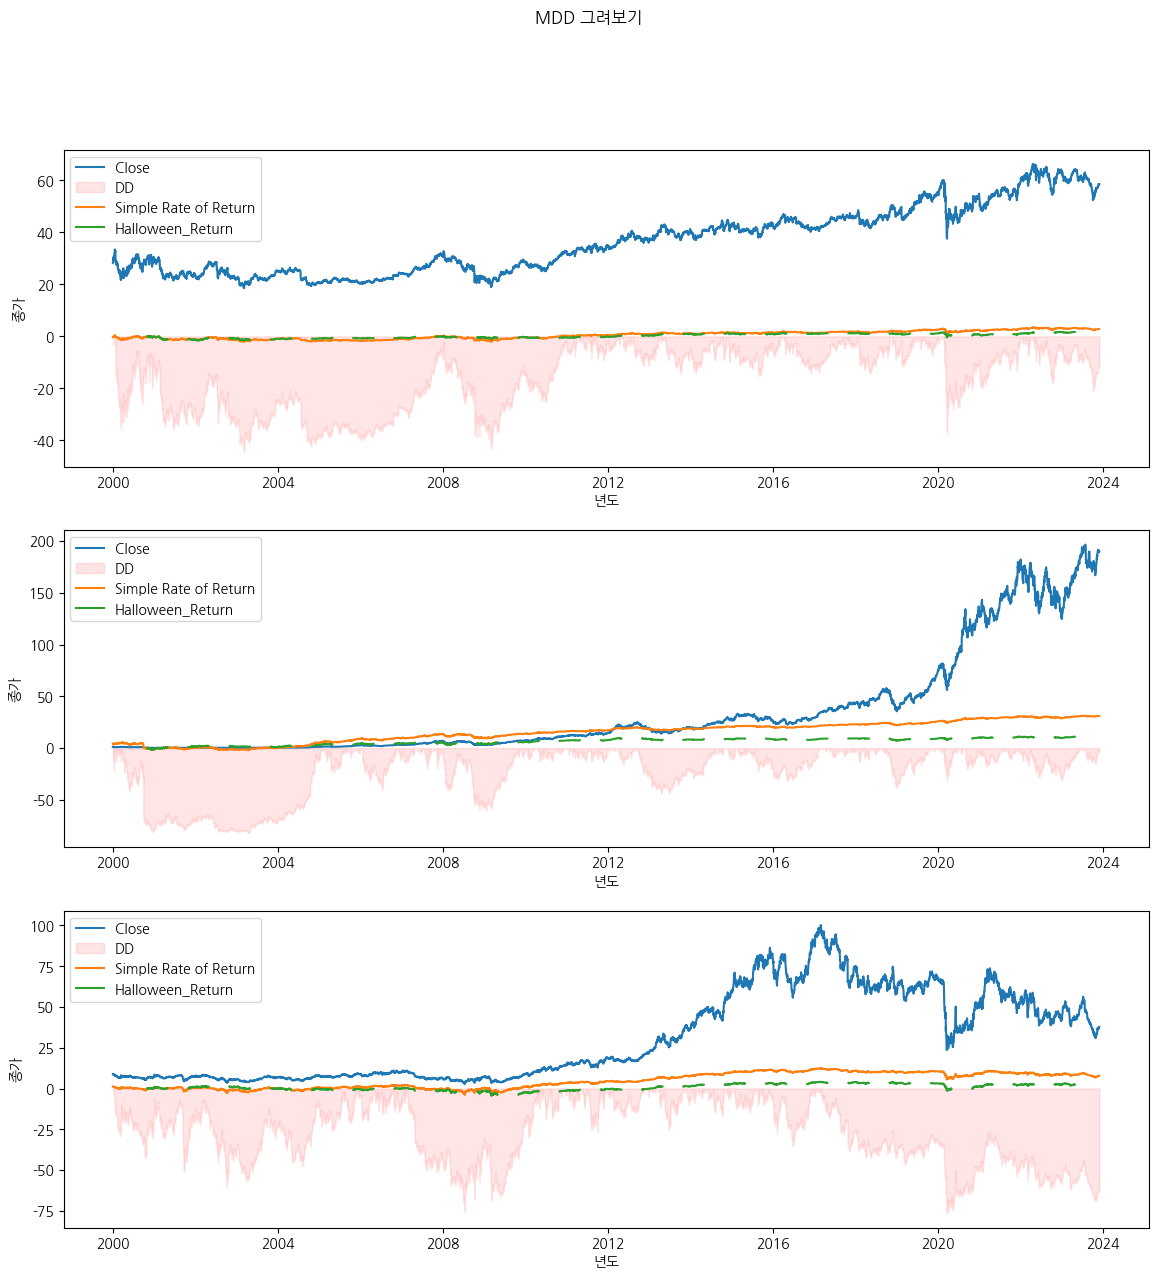

In [179]:

fig, axes = plt.subplots(len(data_df_list),1,figsize=(14,14), dpi=100) # 외곽 사이즈

fig.suptitle('MDD 그려보기')

for idx, df in enumerate(data_df_list):
    # 종가
    axes[idx].plot(df.index, df['Close'], label='Close' )
    axes[idx].fill_between(df.index, df['DD']*-1, label='DD',alpha=0.1, color='red' )
    axes[idx].plot(df.index, df['CAGR'], label='Simple Rate of Return' )
    axes[idx].plot(df.index, df['Halloween_CAGR'], label='Halloween_Return' )    
    # axes[idx].plot(df.index, df['Simple_Rate_of_Return'], label='Simple Rate of Return' )
    # axes[idx].plot(df.index, df['Halloween_Return'], label='Halloween_Return' )
    axes[idx].set_xlabel('년도')
    axes[idx].set_ylabel('종가')
    axes[idx].legend()

# plt.tight_layout()
plt.show()